In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv("historico-contaminacion.csv")
datos = datos[datos.contaminante == "NO2"]
datos["datetime"] = pd.to_datetime(datos.datetime)

In [3]:
datos.head()

,estacion,datetime,contaminante,medida,valido
2,28079004,2017-04-01 01:00:00,NO2,25.0,True
6,28079004,2017-04-01 02:00:00,NO2,21.0,True
10,28079004,2017-04-01 03:00:00,NO2,10.0,True
14,28079004,2017-04-01 04:00:00,NO2,10.0,True
18,28079004,2017-04-01 05:00:00,NO2,8.0,True


In [4]:
datos.loc[datos.valido == False, "medida"] = np.nan
datos["medida"] = datos.groupby("estacion").medida.fillna(method="ffill")

In [5]:
estaciones = pd.read_csv("estaciones.csv")[["ID", "zona"]].set_index("ID")
datos = pd.merge(datos, estaciones, how="inner", left_on="estacion", right_index=True)
datos.head()

,estacion,datetime,contaminante,medida,valido,zona
2,28079004,2017-04-01 01:00:00,NO2,25.0,True,1
6,28079004,2017-04-01 02:00:00,NO2,21.0,True,1
10,28079004,2017-04-01 03:00:00,NO2,10.0,True,1
14,28079004,2017-04-01 04:00:00,NO2,10.0,True,1
18,28079004,2017-04-01 05:00:00,NO2,8.0,True,1


In [6]:
seriecont = datos[datos.valido == True].\
    sort_values("medida", ascending=False).\
    groupby(["zona", "datetime"]).\
    agg({'medida': lambda x: x.head(2).mean()}).\
    reset_index(drop=False).\
    groupby("zona").\
    rolling(window=2, on="datetime").mean().\
    drop("zona", axis=1).reset_index().\
    set_index("datetime").\
    groupby(lambda x: x.date).\
    agg({'medida': max})

In [7]:
seriecont.index.names = ['fecha']
seriecont = seriecont.reset_index()

Text(0.5,1,'Serie resumen de contaminación')

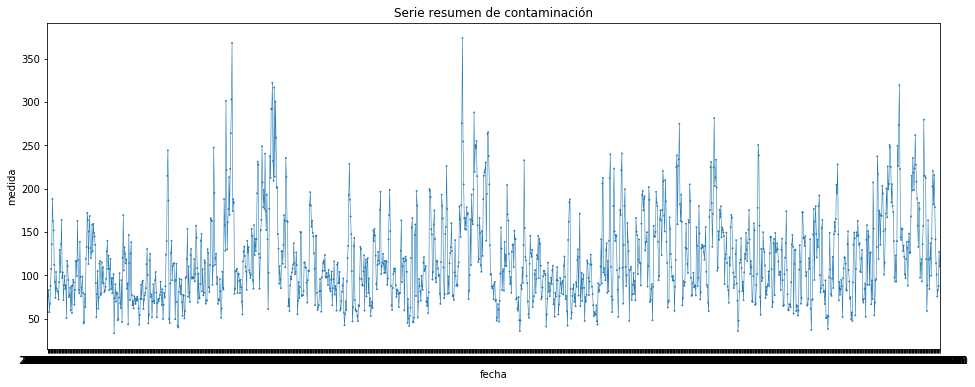

In [8]:
plt.figure(figsize=(16, 6))
sns.pointplot('fecha', 'medida', scale=0.2,
              data=seriecont)
plt.title("Serie resumen de contaminación")

In [9]:
seriecont.to_csv("notebook_serie-contaminacion.csv", index=False)